In [1]:
from model_phantom import *
from linares_plot import * 


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


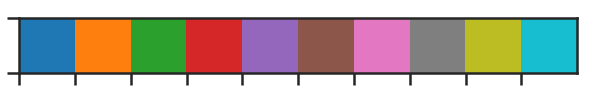

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time');

## Examples

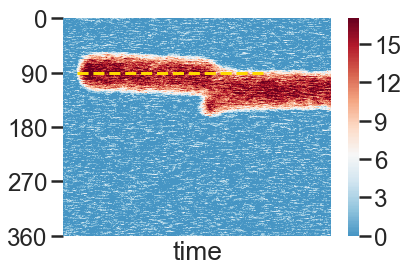

In [179]:
fee=1
fei=1
fie=1
fii=1


on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)


In [ ]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)


In [ ]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=3000, targ_onset_1=700, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)
on[1]

In [ ]:
fee=1
fei=1
fie=1
fii=1

on2= model(totalTime= 3000, targ_onset_1=700, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]

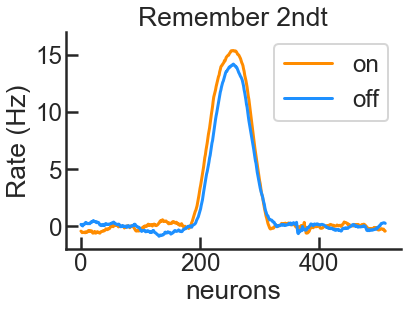

In [186]:
N=512
PA_on = pd.DataFrame(on[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)


PA_off = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


plt.plot(PA_on_rolled, color=c_on,  label='on' )
plt.plot(PA_off_rolled, color= c_off, label='off' )
plt.legend()
plt.title('Remember 2ndt')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('neurons');
plt.ylim(-2,17);

In [47]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

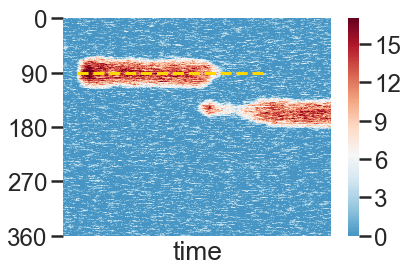

In [175]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)


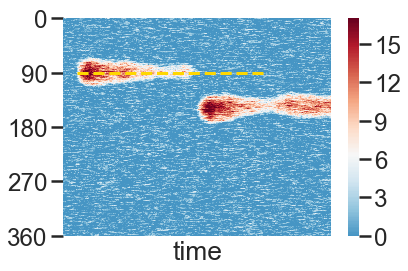

In [70]:

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)

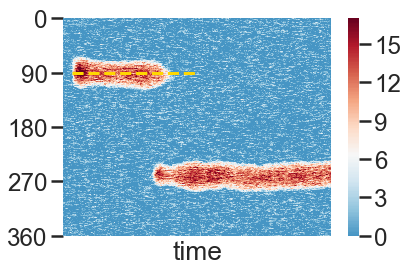

In [180]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)

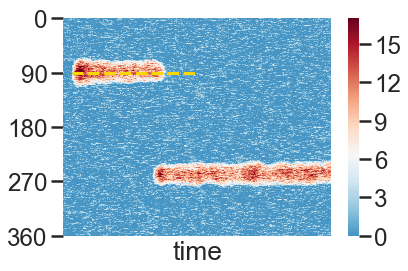

In [181]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)

## Simulations

In [87]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 
# #print('Number cores: '+ str(numcores))

# fee=1
# fei=1
# fie=1
# fii=1

# ON_1_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

Number cores: 7


In [88]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 
# #print('Number cores: '+ str(numcores))

# fee=1
# fei=1
# fie=1
# fii=1

# OFF_1_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

Number cores: 7


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


4.557999999999999 4.749111111111112


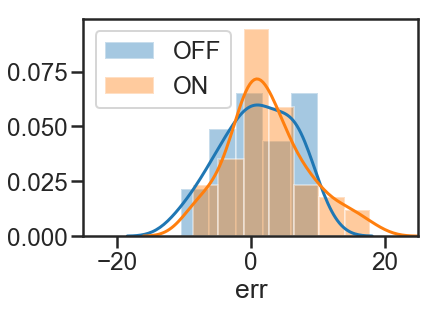

In [203]:
err1_on_f = pd.DataFrame([ON_1_far[i][1] for i in range(len(ON_1_far))])
err1_on_f.columns=['err']
err1_on_f['abs_err']=abs(err1_on_f['err'])
err1_on_f['stimulation']='ON'
err1_on_f['distance']='far'
err1_on_f['order']='1st'
err1_on_f=err1_on_f.loc[err1_on_f['abs_err']<25]


err1_off_f = pd.DataFrame([OFF_1_far[i][1] for i in range(len(OFF_1_far))])
err1_off_f.columns=['err']
err1_off_f['abs_err']=abs(err1_off_f['err'])
err1_off_f['stimulation']='OFF'
err1_off_f['distance']='far'
err1_off_f['order']='1st'
err1_off_f=err1_off_f.loc[err1_off_f['abs_err']<25]



sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.xlim(-25,25)
print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

In [94]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 
# #print('Number cores: '+ str(numcores))

# fee=1
# fei=1
# fie=1
# fii=1

# ON_1_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [95]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 
# #print('Number cores: '+ str(numcores))

# fee=1
# fei=1
# fie=1
# fii=1

# OFF_1_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5.463000000000001 13.541599999999999


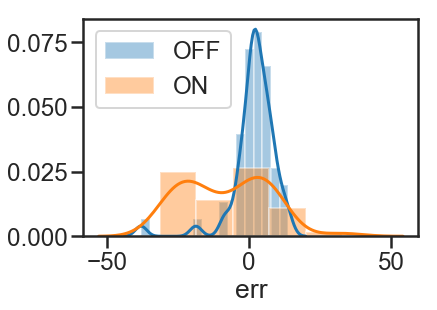

In [204]:
err1_on_c = pd.DataFrame([ON_1_close[i][1] for i in range(len(ON_1_close))])
err1_on_c.columns=['err']
err1_on_c['abs_err']=abs(err1_on_c['err'])
err1_on_c['stimulation']='ON'
err1_on_c['distance']='close'
err1_on_c['order']='1st'

err1_off_c = pd.DataFrame([OFF_1_close[i][1] for i in range(len(OFF_1_close))])
err1_off_c.columns=['err']
err1_off_c['abs_err']=abs(err1_off_c['err'])
err1_off_c['stimulation']='OFF'
err1_off_c['distance']='close'
err1_off_c['order']='1st'


sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())

In [112]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 

# fee=0.94
# fei=0.92
# fie=1.14
# fii=1.08

# ON_2_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [113]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 

# fee=0.94
# fei=0.92
# fie=1.14
# fii=1.08

# OFF_2_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5.000909090909091 5.26595744680851


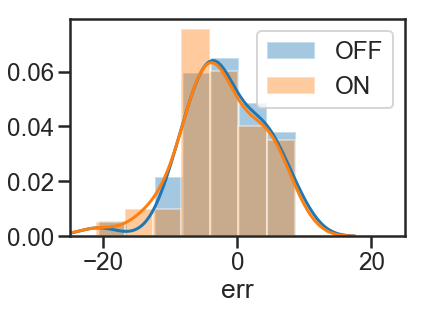

In [205]:
err2_on_f = pd.DataFrame([ON_2_far[i][2] for i in range(len(ON_2_far))])
err2_on_f.columns=['err']
err2_on_f['abs_err']=abs(err2_on_f['err'])
err2_on_f['stimulation']='ON'
err2_on_f['distance']='far'
err2_on_f['order']='2nd'
err2_on_f=err2_on_f.loc[err2_on_f['abs_err']<25]



err2_off_f = pd.DataFrame([OFF_2_far[i][2] for i in range(len(OFF_2_far))])
err2_off_f.columns=['err']
err2_off_f['abs_err']=abs(err2_off_f['err'])
err2_off_f['stimulation']='OFF'
err2_off_f['distance']='far'
err2_off_f['order']='2nd'
err2_off_f=err2_off_f.loc[err2_off_f['abs_err']<25]



sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.xlim(-25,25)
print(err2_off_f.abs_err.mean(), err2_on_f.abs_err.mean())

In [122]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 

# fee=0.94
# fei=0.92
# fie=1.14
# fii=1.08

# ON_2_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [123]:
# n_simuls=50
# numcores = multiprocessing.cpu_count() -1 

# fee=0.94
# fei=0.92
# fie=1.14
# fii=1.08

# OFF_2_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
#            angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
#            GEE=0.068*fee,
#            GII= 0.13*fei,
#            GEI=0.13*fie,
#            GIE=0.042*fii, 
#            sigE=7., sigI=5.,            
#            kappa_E=45, 
#            kappa_I=0.3, 
#            kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
#            plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
#            phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5.133720930232558 4.936060606060606


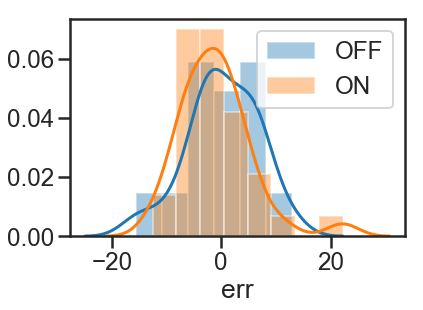

In [206]:
err2_on_c = pd.DataFrame([ON_2_close[i][2] for i in range(len(ON_2_close))])
err2_on_c.columns=['err']
err2_on_c['abs_err']=abs(err2_on_c['err'])
err2_on_c['stimulation']='ON'
err2_on_c['distance']='close'
err2_on_c['order']='2nd'
err2_on_c=err2_on_c.loc[err2_on_c['abs_err']<25]


err2_off_c = pd.DataFrame([OFF_2_close[i][2] for i in range(len(OFF_2_close))])
err2_off_c.columns=['err']
err2_off_c['abs_err']=abs(err2_off_c['err'])
err2_off_c['stimulation']='OFF'
err2_off_c['distance']='close'
err2_off_c['order']='2nd'
err2_off_c=err2_off_c.loc[err2_off_c['abs_err']<25]


sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
#plt.xlim(-20,20)
print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

In [207]:
# df = pd.concat([err2_off_c, err2_on_c, err2_off_f, err2_on_f, 
#                err1_off_c, err1_on_c, err1_off_f, err1_on_f], ignore_index=True)

# df['performance']=df['abs_err']<15

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


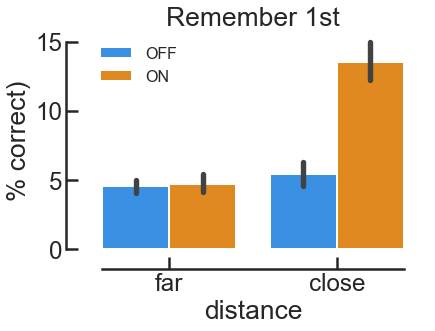

In [208]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df.loc[df['order']=='1st'])
plt.ylabel(r'% correct)')
plt.title('Remember 1st')
#plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


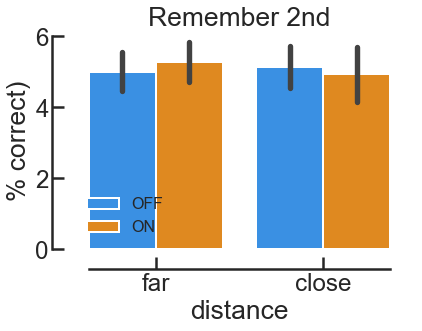

In [209]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df.loc[df['order']=='2nd'])
plt.ylabel(r'% correct)')
plt.title('Remember 2nd')
#plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

In [33]:
df = pd.read_excel('df_phantom.xlsx')
df['perfromance']=df['abs_err']<20

In [38]:
err1_on_f = pd.read_excel('err1_on_f.xlsx')
err1_off_f = pd.read_excel('err1_off_f.xlsx')

err1_on_c = pd.read_excel('err1_on_c.xlsx')
err1_off_c = pd.read_excel('err1_off_c.xlsx')



err2_on_f = pd.read_excel('err2_on_f.xlsx')
err2_off_f = pd.read_excel('err2_off_f.xlsx')

err2_on_c = pd.read_excel('err2_on_c.xlsx')
err2_off_c = pd.read_excel('err2_off_c.xlsx')

In [45]:
df=pd.concat([err1_on_f, err1_off_f, err1_on_c, err1_off_c,
             err2_on_f, err2_off_f, err2_on_c, err2_off_c ])
df['performance']=df['abs_err']<20

In [156]:
# err1_off_f.abs_err.mean()
# sns.distplot(err1_off_f.err)
# err1_off_f_oo = err1_off_f.loc[err1_off_f['abs_err']<30]
# plt.xlim(-30,30)
# err1_off_f_oo.abs_err.mean()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


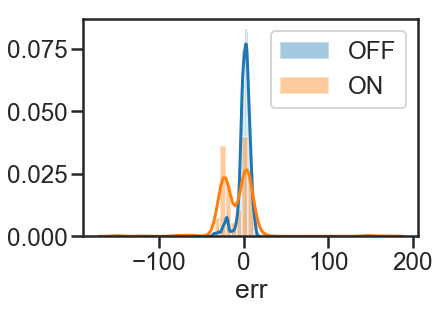

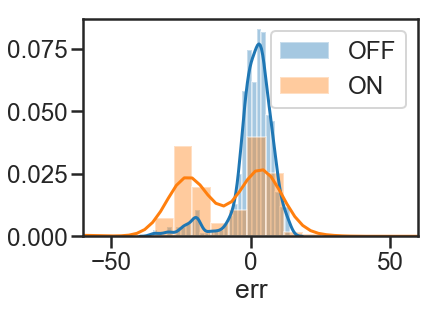

5.39734 15.5897


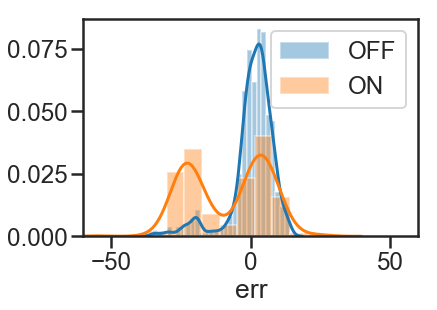

In [110]:
sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.show()

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())


err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']<60]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']<60]

sns.distplot(err1_off_c_o.err, label='OFF')
sns.distplot(err1_on_c_o.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


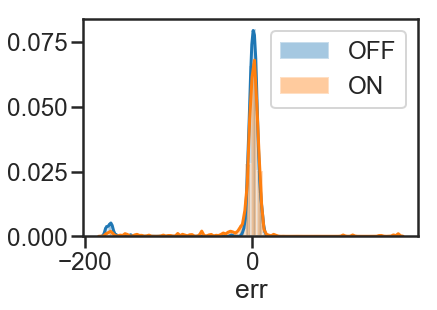

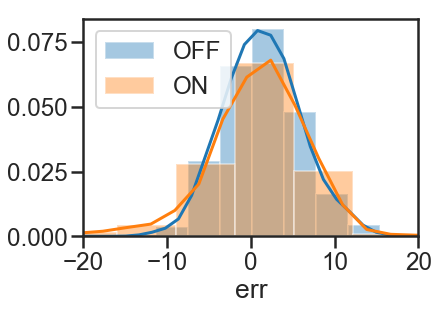

12.07768 14.0323


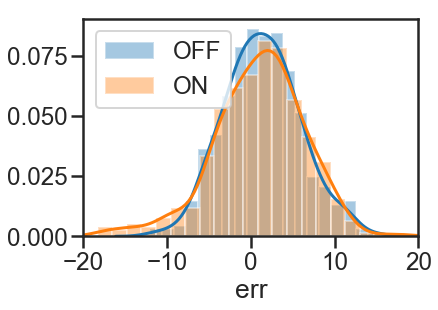

3.7336708860759495 4.297494407158837


In [113]:
sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.show()


sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.xlim(-20,20)
plt.show()
print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

err1_off_f_o = err1_off_f.loc[err1_off_f['abs_err']<20]
err1_on_f_o = err1_on_f.loc[err1_on_f['abs_err']<20]

sns.distplot(err1_off_f_o.err, label='OFF')
sns.distplot(err1_on_f_o.err, label='ON')
plt.legend()
plt.xlim(-20,20)
plt.show()
print(err1_off_f_o.abs_err.mean(), err1_on_f_o.abs_err.mean())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


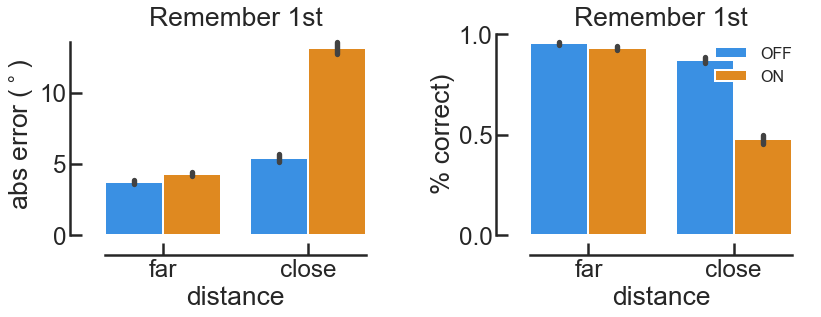

In [120]:
first = pd.concat([err1_on_c_o, err1_off_c_o,err1_on_f_o, err1_off_f_o ])
first['performance']=first['abs_err']<10

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=first, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 1st')
#ax1.set_ylim(2,6)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=first, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct)')
#ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 1st')
#ax2.set_ylim(0.7, 1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


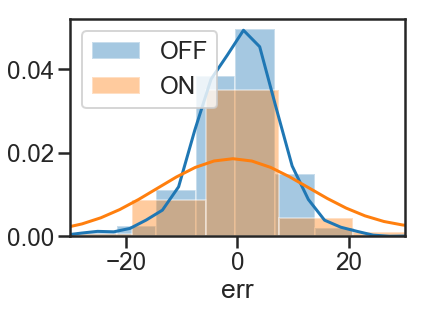

21.6979 34.42
5.4411764705882355 5.2961042944785275


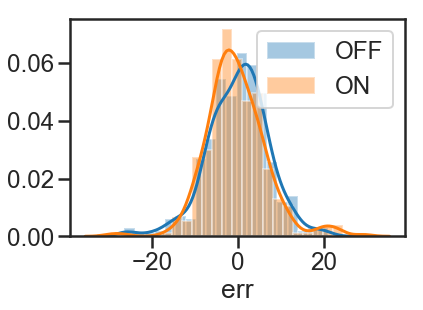

In [79]:
sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
plt.xlim(-30,30)
plt.show()
err2_on_c_o = err2_on_c.loc[err2_on_c['abs_err']<30]
err2_off_c_o = err2_off_c.loc[err2_off_c['abs_err']<30]

sns.distplot(err2_off_c_o.err, label='OFF')
sns.distplot(err2_on_c_o.err, label='ON')
plt.legend()

print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

print(err2_off_c_o.abs_err.mean(), err2_on_c_o.abs_err.mean())


##################################################################
err2_on_c_o = err2_on_c.loc[err2_on_c['abs_err']<30]
err2_off_c_o = err2_off_c.loc[err2_off_c['abs_err']<30]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


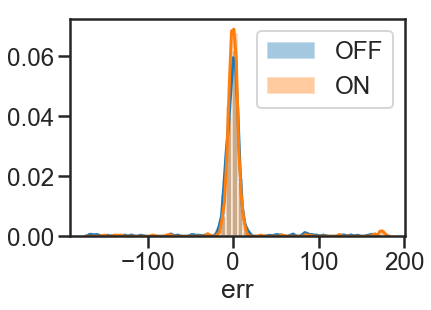

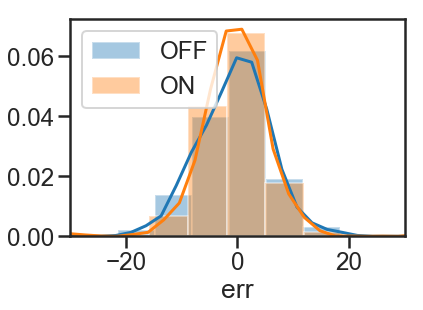

In [103]:
sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.show()


sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.xlim(-30,30)
plt.legend()

##################################################################
err2_on_f_o = err2_on_f.loc[err2_on_f['abs_err']<30]
err2_off_f_o = err2_off_f.loc[err2_off_f['abs_err']<30]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


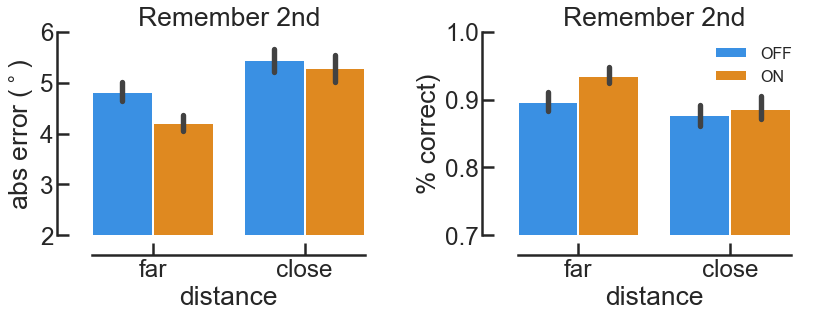

In [102]:
second = pd.concat([err2_on_c_o, err2_off_c_o,err2_on_f_o, err2_off_f_o ])
second['performance']=second['abs_err']<10

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
ax1.set_ylim(2,6)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct)')
#ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
ax2.set_ylim(0.7, 1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

In [46]:
# sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
#             palette = offon_pal, ci=69, data=df.loc[df['order']=='1st'])
# #plt.ylabel(r'% correct)')
# plt.title('Remember 1st')
# #plt.ylim(0.4,1)
# plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# adjust_spines(plt.gca(), ['left', 'bottom'])
# plt.legend(loc='best', frameon=False, prop={'size': 16});
# plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


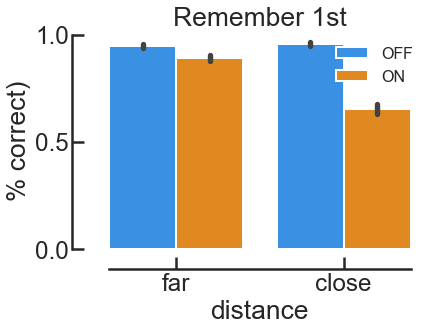

In [47]:
sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df.loc[df['order']=='1st'])
plt.ylabel(r'% correct)')
plt.title('Remember 1st')
#plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


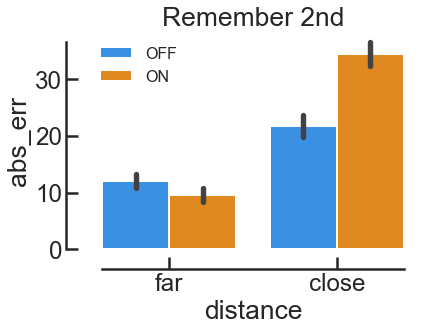

In [48]:
sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df.loc[df['order']=='2nd'])
#plt.ylabel(r'% correct)')
plt.title('Remember 2nd')
#plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


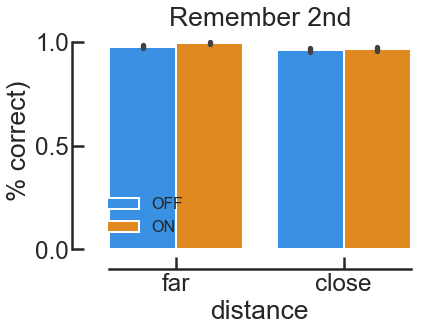

In [37]:
sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df.loc[df['order']=='2nd'])
plt.ylabel(r'% correct)')
plt.title('Remember 2nd')
#plt.ylim(0.4,1)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

## Phantom? 

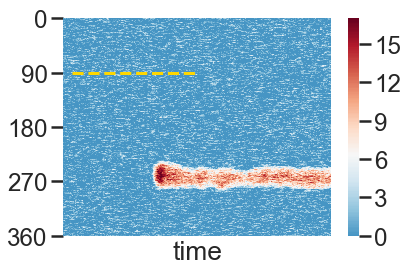

In [163]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=100, phnatom_duration=100)

hemap(on)

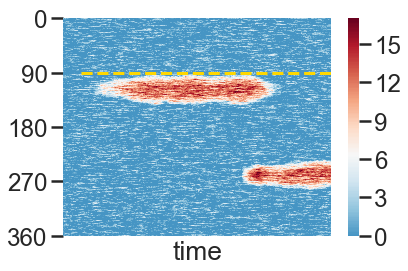

In [162]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=1500, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=100, phnatom_duration=100)

hemap(on)

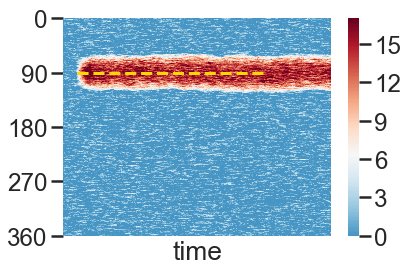

In [164]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=1000, phnatom_duration=100)

hemap(on)

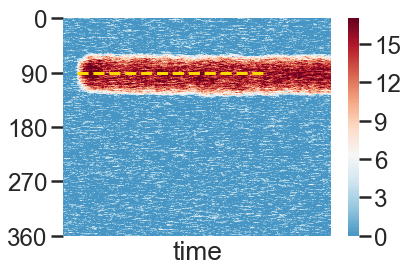

In [166]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=1000, phnatom_duration=100)

hemap(on)